<a href="https://colab.research.google.com/github/PKalyani1994/Recommendation_System/blob/main/Mid_Assignment_Kindle_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised - Kindle Book Recommendation System
##### **Contribution**    - Individual
##### **Team Member 1 -** Padala Kalyani

# **Project Summary -**

The project focuses on building a Book Recommendation System using the Book-Crossing dataset, which provides detailed information about user interactions with books, including demographic data, book attributes, and rating information. The goal is to recommend books that align with users’ interests, thereby improving customer satisfaction.

The system is developed using three main techniques:

**Popularity-Based Recommendation System** – This approach recommends the most popular books to all users, regardless of their individual preferences.

**Memory-Based Collaborative Filtering** – This method leverages past user interactions to compute similarities between users based on the books they have rated or interacted with (user-item relationships). Recommendations are generated through predicted ratings derived from these similarities.

**Model-Based Collaborative Filtering (Latent Factor Models such as Singular Value Decomposition - SVD)** – In this technique, the high-dimensional user-item interaction matrix is decomposed into its singular components. The approximated interaction matrix is then reconstructed, and book recommendations are made based on the predicted ratings.

# **GitHub Link -**

https://github.com/PKalyani1994/Recommendation_System

# **Problem Statement**


With the vast number of books available on platforms like Amazon Kindle and Goodreads, users often struggle to find titles that match their interests. This leads to information overload, reduced engagement, and missed sales opportunities.

The challenge is to design a Book Recommendation System using the Book-Crossing dataset, which includes user demographics, book details, and explicit/implicit ratings. The system should leverage different techniques to provide accurate and personalized book recommendations that enhance user satisfaction and engagement.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from scipy.linalg import svd

### Dataset Loading

In [2]:
# Load Dataset
ratings = pd.read_csv('/content/Ratings.csv')
books = pd.read_csv('/content/Books.csv',low_memory=False)
users = pd.read_csv('/content/Users.csv')

### Dataset First View

In [3]:
# Dataset First Look - Ratings dataset
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
# Dataset First Look - Books dataset
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
# Dataset First Look - Users dataset
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"The Ratings dataframe has {ratings.shape[0]} rows {ratings.shape[1]} columns ")
print(f"The Books dataframe has {books.shape[0]} rows {books.shape[1]} columns ")
print(f"The Users dataframe has {users.shape[0]} rows {users.shape[1]} columns ")

The Ratings dataframe has 1149780 rows 3 columns 
The Books dataframe has 271360 rows 8 columns 
The Users dataframe has 278858 rows 3 columns 


In [7]:
# Merging three datasets
df = ratings.merge(books,on='ISBN')
df = df.merge(users,on='User-ID')
df.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16.0
...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,"cedar park, texas, usa",NaN
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,"cedar park, texas, usa",NaN
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,"quebec, quebec, canada",18.0
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,"mannington, west virginia, usa",38.0


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Book-Title           1031136 non-null  object 
 4   Book-Author          1031134 non-null  object 
 5   Year-Of-Publication  1031136 non-null  object 
 6   Publisher            1031134 non-null  object 
 7   Location             1031136 non-null  object 
 8   Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 70.8+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Location,0
Age,277835


In [11]:
# Filling the Nan values with "Unknown"
df['Publisher'] = df['Publisher'].fillna('Unknown')
df['Book-Author'] = df['Book-Author'].fillna('Unknown')

### What did you know about your dataset?

The data consists of three main datasets. The first is the **Ratings dataset**, which contains the ratings provided by each user for individual books. The second is the **Books dataset**, which includes details such as book title, publisher, book ID, book cover image, and year of publication. The third is the **Users dataset**, which provides information about each user, including their user ID, location, and age. By merging these three datasets, we can create a comprehensive view that combines all the information in one place, allowing us to analyze which users have read specific books and how they have rated them.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Location', 'Age'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,753301.000000
mean,1.405945e+05,2.839051e+00,37.397648
std,8.052466e+04,3.854157e+00,14.098254
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


### Variables Description

**User-ID** – Unique identifier for each individual user.

**ISBN** – Unique identifier for each individual book.

**Book-Rating** – Rating given by a user to a specific book, ranging from 1 to 10. Unrated values are represented as 0.

**Book-Title** – Title of the book.

**Book-Author** – Author of the book.

**Year-Of-Publication** – Year in which the book was published.

**Publisher** – Organization responsible for publishing the book.

**Location** – Geographic region from which the user provided the rating.

**Age** – Age of the user who provided the rating.

## 3. ***Data Wrangling***

### Data Wrangling Code

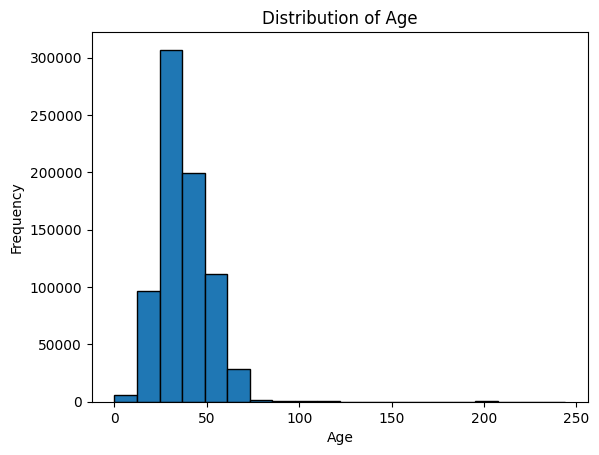

In [14]:
# Visualizing the distribution of age column
plt.hist(df['Age'].dropna(), bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [15]:
# Removing outliers in the Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)

In [16]:
# Fill NaN values with mean of Age column
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Convert Age column to integer
df['Age'] = df['Age'].astype(int)


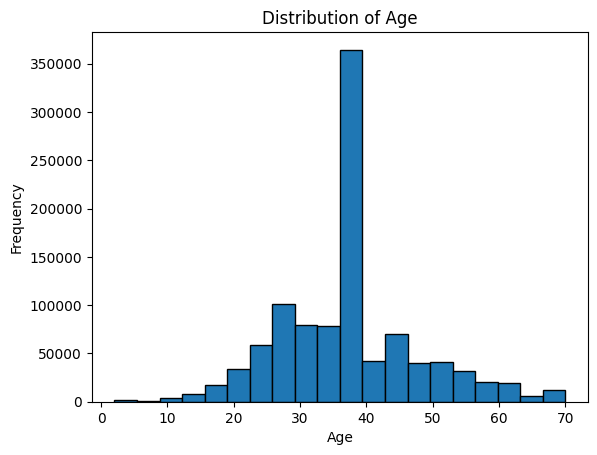

In [17]:
# Visualizing the Age column after removing outliers and filling the null values
plt.hist(df['Age'].dropna(), bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

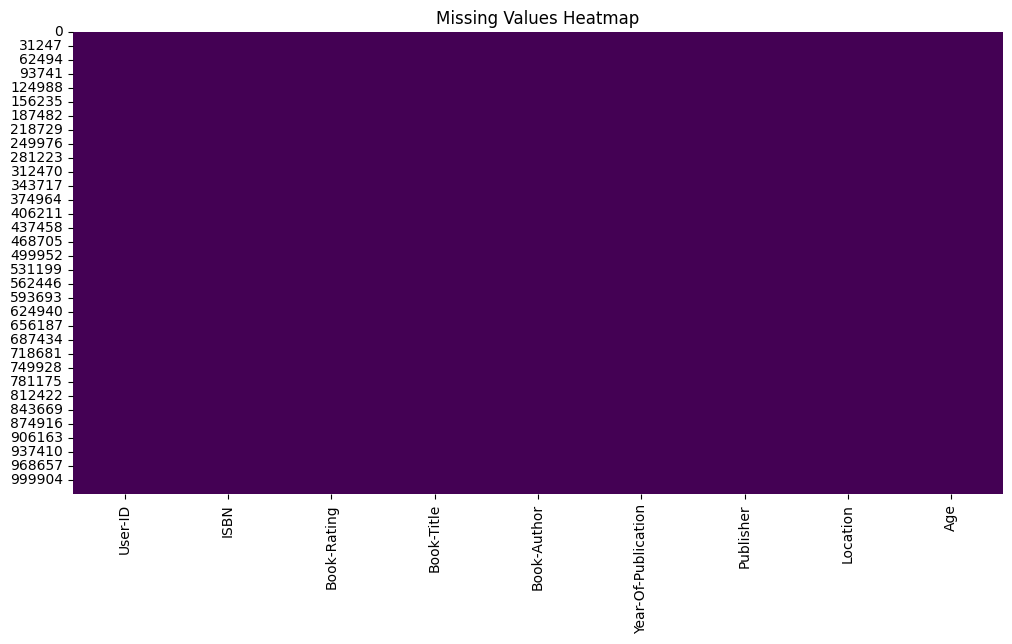

In [18]:
# Visualizing the missing values in the dataset
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
print(df['Year-Of-Publication'].unique())

['2002' '2001' '1996' '1999' '1998' '1994' '1995' '2003' '1997' '2024'
 '1992' '1983' '2000' '0' '1989' '1991' '1993' '1976' '1990' '1982' '1988'
 '1981' '1986' '1987' '1980' '2004' '1984' '1985' '1979' '1974' '1977'
 '1965' '1972' '1978' '1962' '1957' '1958' '1960' '1963' '1969' '1970'
 '1975' '1959' '1968' '1971' '1973' '1950' '1964' '1955' '1953' '1966'
 '1930' '1961' '1952' '1940' '1954' '1967' '1911' '1946' '1941' '1920'
 '1956' '1942' '1951' '1948' '2005' '1943' '1937' '1923' '1945' '1947'
 '1936' '1925' '1927' '2030' '2011' '2020' '1939' '1926' '1938' '1904'
 '1949' '1932' '1929' '1944' '1933' '1922' '1897' '2050' '1902' '1924'
 '1921' '1900' '2038' '2010' '1928' '2006' '1901' '2026' '2021' '1931'
 '1378' '1908' 'DK Publishing Inc' 'Gallimard' '1909' '2012' '2008' '1935'
 '1376' '2037' '1906' '1806' '1917' '1919' '1914' '1934' '1910']


In [20]:
# list of known publisher misentries
misentries = ['DK Publishing Inc', 'Gallimard']

# Step 1: Move them to Publisher column
df.loc[df['Year-Of-Publication'].isin(misentries), 'Publisher'] = df.loc[df['Year-Of-Publication'].isin(misentries), 'Year-Of-Publication']

# Step 2: Set Year-Of-Publication as NaN for those rows
df.loc[df['Year-Of-Publication'].isin(misentries), 'Year-Of-Publication'] = 0

In [21]:
# looking at the unique values after cleaning
print(df['Year-Of-Publication'].unique())

['2002' '2001' '1996' '1999' '1998' '1994' '1995' '2003' '1997' '2024'
 '1992' '1983' '2000' '0' '1989' '1991' '1993' '1976' '1990' '1982' '1988'
 '1981' '1986' '1987' '1980' '2004' '1984' '1985' '1979' '1974' '1977'
 '1965' '1972' '1978' '1962' '1957' '1958' '1960' '1963' '1969' '1970'
 '1975' '1959' '1968' '1971' '1973' '1950' '1964' '1955' '1953' '1966'
 '1930' '1961' '1952' '1940' '1954' '1967' '1911' '1946' '1941' '1920'
 '1956' '1942' '1951' '1948' '2005' '1943' '1937' '1923' '1945' '1947'
 '1936' '1925' '1927' '2030' '2011' '2020' '1939' '1926' '1938' '1904'
 '1949' '1932' '1929' '1944' '1933' '1922' '1897' '2050' '1902' '1924'
 '1921' '1900' '2038' '2010' '1928' '2006' '1901' '2026' '2021' '1931'
 '1378' '1908' 0 '1909' '2012' '2008' '1935' '1376' '2037' '1906' '1806'
 '1917' '1919' '1914' '1934' '1910']


In [22]:
# Converting the datatype of year column to integer datatype
df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], errors='coerce')

In [23]:
# data was collected in august 2004, so keeping the values intact.
max_year = 2004
valid_range = (df['Year-Of-Publication'] >= 1900) & (df['Year-Of-Publication'] <= max_year)
median_year = int(df.loc[valid_range, 'Year-Of-Publication'].median())
print("Median valid year:", median_year)

Median valid year: 1997


In [24]:
# Converting the unusual years to median year
df.loc[~valid_range | (df['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = median_year

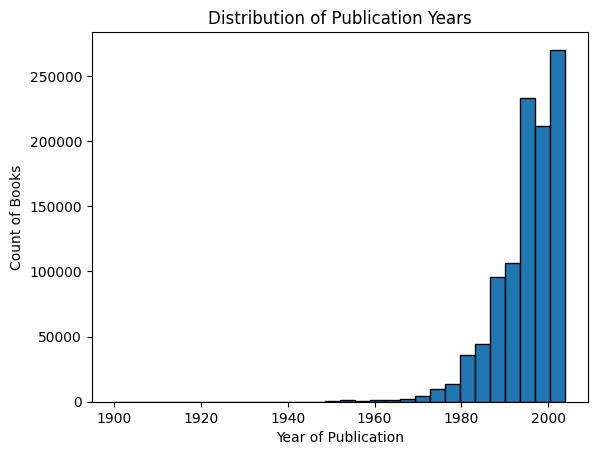

In [25]:
# visualizing the distribution of Year of publication
plt.hist(df['Year-Of-Publication'], bins=30, edgecolor='k')
plt.xlabel("Year of Publication")
plt.ylabel("Count of Books")
plt.title("Distribution of Publication Years")
plt.show()

In [26]:
# Observation - There different ISBNs for the same Book Titles.
print(f"There are {df['ISBN'].nunique()} unique Book Ids in the dataset")
print(f"There are {df['Book-Title'].nunique()} unique Book Titles in the dataset")

There are 270151 unique Book Ids in the dataset
There are 241071 unique Book Titles in the dataset


In [27]:
# The number of users in the dataset
print(f"There are {df['User-ID'].nunique()} unique Users in the dataset")

There are 92106 unique Users in the dataset


In [28]:
# Extracting the country from the Location column
# Split Location into words and take the last one as Country
df['Country'] = df['Location'].str.split().str[-1]

# Drop the original Location column
df.drop(columns=['Location'], inplace=True)

# Verify
print(df[['Country']].head())

     Country
0        usa
1        usa
2  australia
3    croatia
4    croatia


In [29]:
# The unique country names
print(df['Country'].unique())

['usa' 'australia' 'croatia' 'france' ',' 'arabia' 'switzerland' 'canada'
 'germany' 'spain' 'kingdom' 'zealand' 'brazil' 'italy' 'austria' 'bern,'
 'malaysia' 'portugal' 'guernsey' 'rica' 'norway' 'netherlands' 'belgium'
 'denmark' 'sweden' 'italy"' 'zuid-holland,' 'indonesia'
 'baden-württemberg,' 'japan' 'hernando' 'maryland,' 'mexico' 'kansas,'
 'cyprus' 'india' 'philippines' 'greece' 'quit' 'finland' 'romania'
 'california,' 'pakistan' 'mexico,' 'nebr,' 'texas,' 'chile' 'missouri,'
 'michigan,' 'ethiopia' 'singapore' 'taiwan' 'wicklow,' 'penang,' 'africa'
 'alderney' 'poland' 'latvia' 'ireland' 'argentina' 'n/a' 'iran'
 'slovenia' 'csa' 'jersey,' 'georgia,' 'kazakhstan' 'turkey"' 'kong'
 'florida,' 'alaska,' 'israel' 'turkey' 'columbia,' 'china' 'dc,'
 'england,' 'malta' 'ontario,' 'tennessee,' 'space' 'korea' 'canterbury,'
 'rwanda' 'guatemala' 'scotia,' 'españa' 'tobago' 'slovakia' 'virginia,'
 'kerala,' 'thailand' 'bolivia' 'n/a,' 'republic' 'colombia' 'monaco'
 'luxembourg' 's

### What all manipulations have you done and insights you found?

1. Cleaned the Age column by handling outliers using the IQR method and applied mean imputation for missing values.

2. Identified two misentries in the Year of Publication column containing publisher information and corrected them accordingly.

3. Kept the Year of Publication column intact by removing invalid entries and applying median imputation where necessary.

4. Filled two missing values in the Author column with Unknown.

5. Converted the Age and Year of Publication columns into integer data types.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [30]:
# Filtering the dataset that have explicit ratings(ratings given by user specifically, few ratings are zero that can be avoided)
explicit_ratings = df[df['Book-Rating'] != 0]

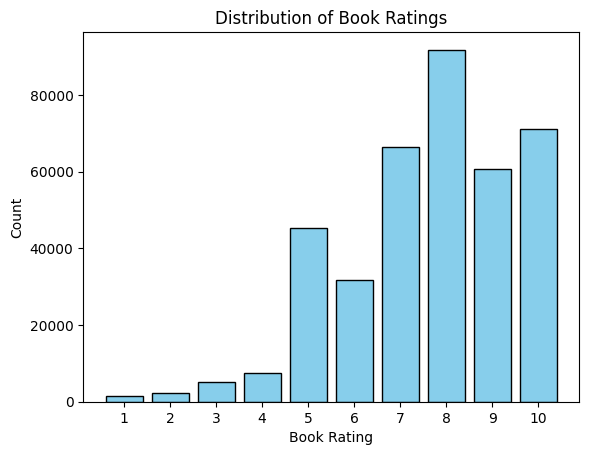

In [31]:
# Chart - 1 visualization code
explicit_ratings_1 = explicit_ratings['Book-Rating'].value_counts().reset_index().sort_values('Book-Rating',ascending=False)
plt.bar(explicit_ratings_1["Book-Rating"], explicit_ratings_1["count"], color="skyblue", edgecolor="black")
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.title("Distribution of Book Ratings")
plt.xticks(explicit_ratings_1["Book-Rating"])
plt.show()

**Observations**:

1. Most of the ratings fall between 7 and 10.
2. The lowest rating is 1.
3. The mode of the ratings is 8.

#### Chart - 2

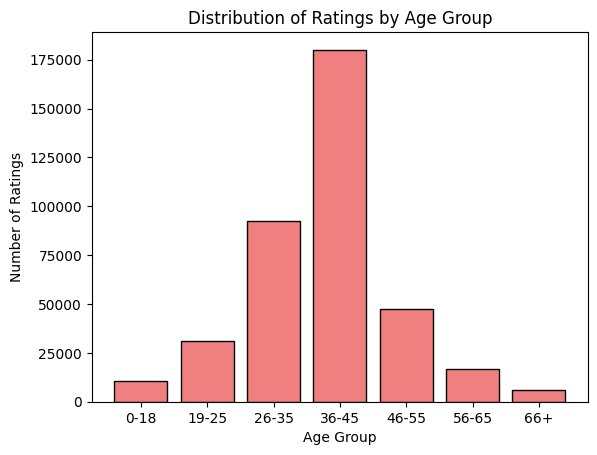

In [32]:
# Create a copy to avoid SettingWithCopyWarning
age_ratings = explicit_ratings[['Age', 'Book-Rating']].copy()

# Define age bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66+"]

# Create a new column with age groups
age_ratings["AgeGroup"] = pd.cut(age_ratings["Age"], bins=bins, labels=labels, right=False)

# Count ratings per age group
age_group_counts = (
    age_ratings.groupby("AgeGroup", observed=False)["Book-Rating"]
    .count()
    .reset_index()
)

# Plot
plt.bar(age_group_counts["AgeGroup"], age_group_counts["Book-Rating"], color="lightcoral", edgecolor="black")
plt.xlabel("Age Group")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Ratings by Age Group")
plt.show()

**Observations**
1. The age group 36–45 has the highest number of readers and ratings.
2. Individuals below 19 tend to read and rate books less frequently.
3. Individuals above 66 also show lower reading and rating activity.

#### Chart - 3

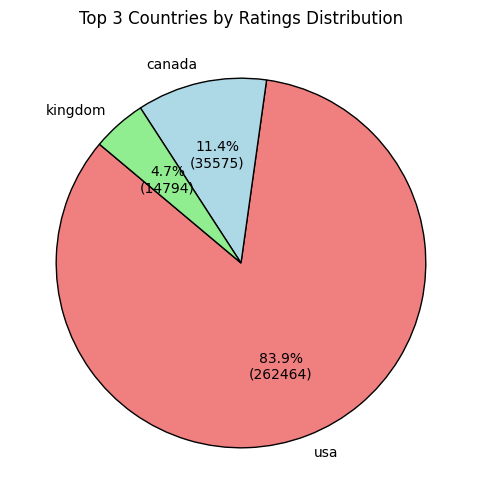

In [33]:
# Visualizing the top 3 countries whre users had given highest number of ratings
# Step 1: Keep only required columns
country_wise_ratings = explicit_ratings[["Country", "Book-Rating"]]

# Step 2: Group by country and count ratings
country_counts = (
    country_wise_ratings.groupby("Country")["Book-Rating"]
    .count()
    .reset_index(name="RatingCount")
)

# Step 3: Sort and select top 3
top3_countries = country_counts.sort_values(
    by="RatingCount", ascending=False
).head(3)

# Function to show both counts and percentages
def autopct_func(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

# Step 4: Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    top3_countries["RatingCount"],
    labels=top3_countries["Country"],
    autopct=lambda pct: autopct_func(pct, top3_countries["RatingCount"]),
    startangle=140,
    colors=["lightcoral", "lightblue", "lightgreen"],
    wedgeprops={"edgecolor": "black"}
)
plt.title("Top 3 Countries by Ratings Distribution")
plt.show()


**Obervations**:
1. The USA has the largest number of users providing ratings, with a total of 262,464 ratings.
2. Canada ranks second, with 35,575 ratings from its users.
3. The United Kingdom is third, with 14,794 ratings, which is relatively lower compared to the USA and Canada.

#### Chart - 4

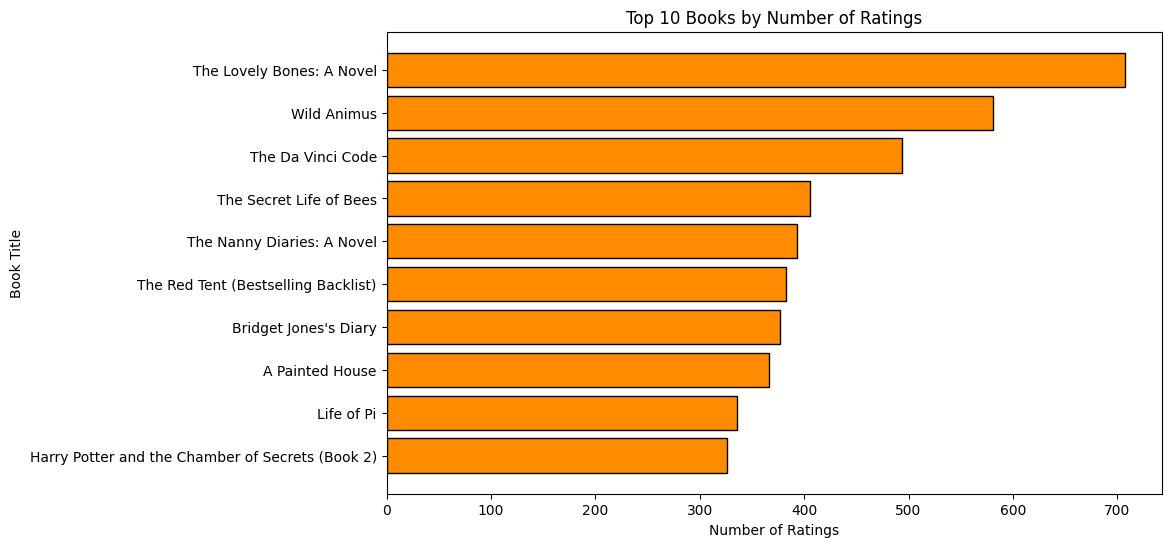

In [34]:
# Chart - 4 visualization code for top books by number of ratings
# Step 1: Keep only Book-Title and Book-Rating columns
BookTitle_wise_ratings = explicit_ratings[["Book-Title", "Book-Rating"]]

# Step 2: Group by Book-Title and count ratings
booktitle_counts = (
    BookTitle_wise_ratings.groupby("Book-Title")["Book-Rating"]
    .count()
    .reset_index(name="RatingCount")
)

# Step 3: Sort by RatingCount and pick top 10
top10_books = booktitle_counts.sort_values(
    by="RatingCount", ascending=False
).head(10)

# Step 4: Horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top10_books["Book-Title"], top10_books["RatingCount"],
         color="darkorange", edgecolor="black")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.title("Top 10 Books by Number of Ratings")
plt.gca().invert_yaxis()  # Highest rating count at the top
plt.show()

**Observation**:
1. “The Lovely Bones – A Novel” has received the highest number of ratings, with more than 700 users reading and rating the book.
2. “Wild Animus” is the second most read and rated book, with nearly 600 ratings.

#### Chart - 5

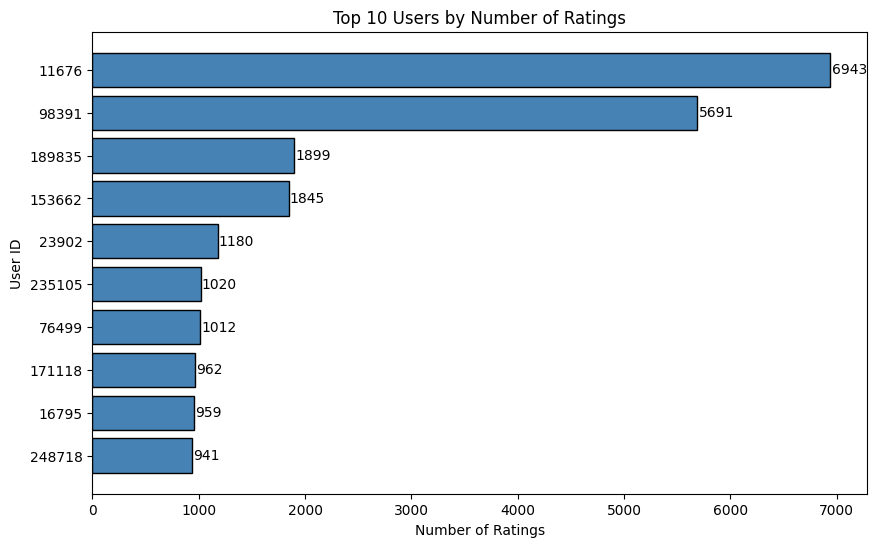

In [35]:
# Chart - 5 visualization code for top users by number of ratings
# Step 1: Keep only User-ID and Book-Rating columns
user_wise_ratings = explicit_ratings[["User-ID", "Book-Rating"]]

# Step 2: Group by User-ID and count ratings
user_counts = (
    user_wise_ratings.groupby("User-ID")["Book-Rating"]
    .count()
    .reset_index(name="RatingCount")
)

# Step 3: Sort by RatingCount and pick top 10 users
top10_users = user_counts.sort_values(
    by="RatingCount", ascending=False
).head(10)

# Step 4: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_users["User-ID"].astype(str), top10_users["RatingCount"],
                color="steelblue", edgecolor="black")

plt.xlabel("Number of Ratings")
plt.ylabel("User ID")
plt.title("Top 10 Users by Number of Ratings")
plt.gca().invert_yaxis()  # Highest at the top

# Add labels
for bar in bars:
    plt.text(bar.get_width() + 10,
             bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())),
             va='center')

plt.show()

**Observation**
1. User-ID 11676 has read the largest number of books, giving a total of 6,943 ratings.
2. User-ID 98391 ranks second, with 5,691 ratings.

#### Chart - 6

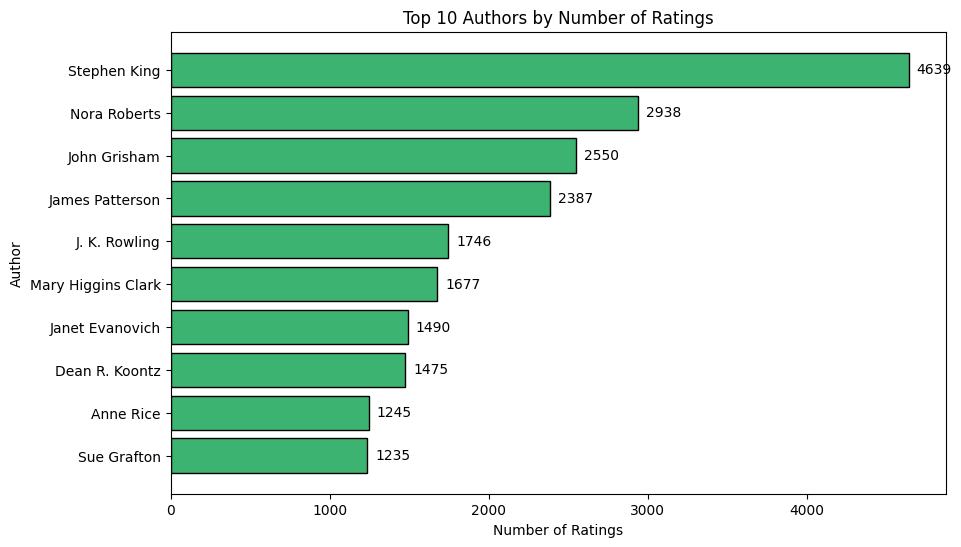

In [36]:
# Chart - 6 visualization code for top 10 authors by ratings
# Step 1: Keep only Book-Author and Book-Rating columns
author_wise_ratings = explicit_ratings[["Book-Author", "Book-Rating"]]

# Step 2: Group by Book-Author and count ratings
author_counts = (
    author_wise_ratings.groupby("Book-Author")["Book-Rating"]
    .count()
    .reset_index(name="RatingCount")
)

# Step 3: Sort by RatingCount and pick top 10 authors
top10_authors = author_counts.sort_values(
    by="RatingCount", ascending=False
).head(10)

# Step 4: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_authors["Book-Author"], top10_authors["RatingCount"],
                color="mediumseagreen", edgecolor="black")

plt.xlabel("Number of Ratings")
plt.ylabel("Author")
plt.title("Top 10 Authors by Number of Ratings")
plt.gca().invert_yaxis()  # Highest at the top

# Add labels
for bar in bars:
    plt.text(bar.get_width() + 50,
             bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())),
             va='center')

plt.show()

**Observations**:
1. Books by Stephen King have received the highest number of ratings, with a total of 4,639 ratings.
2. Nora Roberts ranks second, with her books receiving approximately 2,938 ratings.

#### Chart - 7

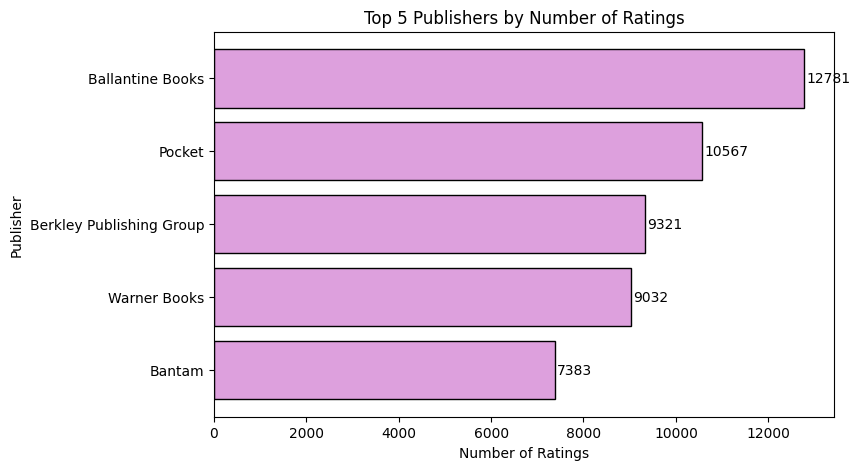

In [37]:
# Chart - 7 visualization code for top publishers by ratings
# Step 1: Keep only Publisher and Book-Rating columns
publisher_wise_ratings = explicit_ratings[["Publisher", "Book-Rating"]]

# Step 2: Group by Publisher and count ratings
publisher_counts = (
    publisher_wise_ratings.groupby("Publisher")["Book-Rating"]
    .count()
    .reset_index(name="RatingCount")
)

# Step 3: Sort by RatingCount and pick top 5 publishers
top5_publishers = publisher_counts.sort_values(
    by="RatingCount", ascending=False
).head(5)

# Step 4: Plot horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(top5_publishers["Publisher"], top5_publishers["RatingCount"],
                color="plum", edgecolor="black")

plt.xlabel("Number of Ratings")
plt.ylabel("Publisher")
plt.title("Top 5 Publishers by Number of Ratings")
plt.gca().invert_yaxis()  # Highest at the top

# Add labels
for bar in bars:
    plt.text(bar.get_width() + 50,
             bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())),
             va='center')

plt.show()

**Observations**:
1. "Ballantine Books" has received the highest number of ratings for its published books, with a total of 12,781 ratings.
2. "Pocket" ranks second, with its books receiving 10,567 ratings.

## ***5. ML Model Implementation***

### ML Model - 1: **Popularity Filtering Using Weighted Average**

In [38]:
# Assigning the average ratings and number of ratings for each book id.
explicit_ratings = explicit_ratings.copy()

explicit_ratings['Rating-count'] = explicit_ratings.groupby('ISBN')['Book-Rating'].transform('count')
explicit_ratings['Rating-mean']  = explicit_ratings.groupby('ISBN')['Book-Rating'].transform('mean')
explicit_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,Country,Rating-count,Rating-mean
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,37,usa,1,5.000000
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,16,croatia,1,3.000000
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,16,croatia,1,6.000000
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,37,usa,81,7.580247
13,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,25,usa,30,8.000000
...,...,...,...,...,...,...,...,...,...,...,...
1031128,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,37,usa,57,6.964912
1031130,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing,37,usa,1,5.000000
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,37,usa,3,7.000000
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,38,usa,18,8.444444


**popularity index**:

WR = [(v * R)/(v + m)] + [(m * c)/(v + m)]

where,

v is the number of votes for the books;

m is the minimum votes required to be listed in the chart;

R is the average rating of the book; and

C is the mean vote across the whole report.

In [39]:
# calculating the variables for popularity index
c = explicit_ratings['Rating-mean'].mean()
m = explicit_ratings['Rating-count'].quantile(0.90)
popular_books_df = explicit_ratings[explicit_ratings['Rating-count'] >= m]
print(f'C={c} , m={m}')
popular_books_df.shape

C=7.626700569505161 , m=64.0


(38570, 11)

In [40]:
# defining the custom function for weighted average
def weighted_average(my_df,m=m,c=c):
  v = my_df['Rating-count']
  r = my_df['Rating-mean']
  return ((v * r)/(v + m)) + ((m * c)/(v + m))

In [41]:
# Applying the custom function and calculting the weighted average for all the rows.
# Sorting the books according to highest weighted average
explicit_ratings['Popularity_Index'] = explicit_ratings.apply(weighted_average, axis=1)
final_popular_df = explicit_ratings.sort_values('Popularity_Index', ascending=False)
final_popular_df = final_popular_df.drop_duplicates('ISBN')

In [42]:
# Presenting the top most popular books
final_popular_df = final_popular_df.reset_index(drop=True)
final_popular_df.head(20)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,Country,Rating-count,Rating-mean,Popularity_Index
0,153971,0439139597,9,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,37,usa,137,9.262774,8.741835
1,10697,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,20,usa,313,8.939297,8.716469
2,126693,043935806X,10,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,33,canada,206,9.033981,8.700403
3,178953,0446310786,9,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company,16,usa,214,8.943925,8.640679
4,267830,0439136369,8,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,70,usa,133,9.082707,8.609690
5,225078,0345339738,9,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,1986,Del Rey,46,usa,77,9.402597,8.596517
6,169192,0439136350,10,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,35,usa,141,9.035461,8.595653
7,139458,0590353403,10,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,38,usa,119,8.983193,8.508791
8,57398,0439064872,10,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,39,usa,189,8.783069,8.490549
9,143964,0439064864,8,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,26,usa,126,8.920635,8.484783


**Insights from Top 5 Popular Books using Popularity Index as a metric**:

**Top 1: Harry Potter and the Goblet of Fire (Book 4) by J. K. Rowling**

1. Popularity Index: 8.74

2. Received 137 ratings with a high mean rating of 9.26.

3. Strong preference among readers aged 37 (USA).

4. Indicates Harry Potter series continues to dominate user interest.

**Top 2: Harry Potter and the Sorcerer’s Stone (Book 1) by J. K. Rowling**

1. Popularity Index: 8.72

2. The most rated among the list (313 ratings) with a mean rating of 8.94.

3. Popular among younger readers (20 years, USA).

4. Establishes its position as a classic entry point to the Harry Potter universe.

**Top 3: Harry Potter and the Order of the Phoenix (Book 5) by J. K. Rowling**

1. Popularity Index: 8.70

2. Received 206 ratings with a mean rating of 9.03.

3. Strong engagement in Canada.

4. Reinforces the sustained popularity of later Harry Potter books.

**Top 4: To Kill a Mockingbird by Harper Lee**

1. Popularity Index: 8.64

2. A non-fantasy classic with 214 ratings and a mean rating of 8.94.

3. Popular across a younger demographic (16 years, USA).

4. Shows that timeless literature continues to compete with fantasy series.

**Top 5: Harry Potter and the Prisoner of Azkaban (Book 3) by J. K. Rowling**

1. Popularity Index: 8.61

2. Gained 133 ratings with a mean rating of 9.08.

3. Strong interest from older readers (70 years, USA).

4. Demonstrates cross-generational appeal of the Harry Potter series.

### ML Model - 2: **Memory Based Collaborative Filtering** (User-Item Based)

In [43]:
# Excluding the unnecessary columns for modeling
books_df = books.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'])
books_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [44]:
# view of columns from ratings dataset
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [45]:
# Merging the ratings and books datasets
ratings = ratings.merge(books_df,on='ISBN')

In [46]:
# Filtering the ratings dataset with the reliable users i.e, users who read and rated at least 200 books
x = ratings.groupby('User-ID')['Book-Rating'].count()
x = x[x.values > 200].index
filtered_df = ratings[ratings['User-ID'].isin(x)]
filtered_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books
...,...,...,...,...,...,...,...
1029357,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)
1029358,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim"
1029359,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann
1029360,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN)


In [47]:
# Filtering the dataset with popular books i.e, books those received at least 50 number of ratings after being read by users.
y = filtered_df.groupby('Book-Title')['Book-Rating'].count()
y = y[y.values >= 50].index
filtered_df = filtered_df[filtered_df['Book-Title'].isin(y)]
filtered_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy
...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major


In [48]:
# Create a user-item rating matrix
user_item_matrix = pd.pivot_table(filtered_df, values='Book-Rating', index='User-ID', columns='ISBN', fill_value=0)
user_item_matrix

ISBN,0001047973,0006177379,0020697406,002542730X,002542730x,0060008024,0060008032,006001203X,0060086246,0060090367,...,B00001IVC7,B00001U0CP,B00006JO6O,B00007CWQC,B00008WFXL,B00009EF82,B00009NDAN,B0000T6KHI,B0001PIOX4,B000234N76
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Calculate the cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

In [50]:
# Labeling the index and columns and creating the dataframe for the user-similarity matrix
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_matrix.index,   # user_id as row labels
    columns=user_item_matrix.index  # user_id as column labels
)

In [51]:
# Define a function to get movie recommendations for a user
def get_recommendations(User_ID, top_n=5):
    # Get the similarity scores for the target user
    target_user_similarity = user_similarity_df[User_ID]

    # Get the user's ratings
    user_ratings = user_item_matrix.loc[User_ID]

    # Initialize an empty list to store recommendations
    recommendations = []

    # Iterate over each book
    for book_id in user_item_matrix.columns:
        # Skip book the user has already rated
        if user_ratings[book_id] > 0:
            continue

        # Calculate the weighted sum of ratings for this book based on user similarity
        weighted_sum = sum(target_user_similarity[other_user_id] * user_item_matrix.loc[other_user_id, book_id]
                           for other_user_id in user_item_matrix.index)/len(target_user_similarity)

        # Calculate the average similarity score for this book
        rated_users_similarity_sum = sum(target_user_similarity[other_user_id]
                                         for other_user_id in user_item_matrix.index
                                         if user_item_matrix.loc[other_user_id, book_id] > 0)
        num_rated_users  = (len([other_user_id for other_user_id in user_item_matrix.index
                    if user_item_matrix.loc[other_user_id, book_id] > 0]))
        average_similarity = rated_users_similarity_sum / num_rated_users  if num_rated_users  > 0 else 0

        # Calculate the predicted rating for this book
        predicted_rating = weighted_sum / average_similarity if average_similarity > 0 else 0

        # Add the book_id and predicted rating to the recommendations list
        recommendations.append((book_id, predicted_rating))

    # Sort recommendations by predicted rating in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Get the top N recommended book_id
    top_recommendations = [book_id for book_id, _ in recommendations[:top_n]]
    return top_recommendations

In [52]:
# Getting top recommendations for specific userid - 23902
top_recommends_for_user = get_recommendations(User_ID=23902, top_n=5)

In [53]:
# looking at the top booksids recommended for the above user
top_recommends_for_user

['0316666343', '0385504209', '059035342X', '0312195516', '0743418174']

In [54]:
# Showing the Book TitLes for top recommendations for the specific userid-23902
result = books.loc[books['ISBN'].isin(top_recommends_for_user), ['ISBN', 'Book-Title']]
result.index = range(1, len(result) + 1)
result

,ISBN,Book-Title
1,0316666343,The Lovely Bones: A Novel
2,0312195516,The Red Tent (Bestselling Backlist)
3,0385504209,The Da Vinci Code
4,0743418174,Good in Bed
5,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...


The **Memory Based Recommendation model** has memorized the similarities and recommeded the specific user 23902 with top 5 best recommendations as "The Lovely Bones: A Novel", "The Red Tent (Bestselling Backlist)", "The Da Vinci Code", "Good in Bed", "Harry Potter and the Sorcerer's Stone ".

### ML Model - 3: **Model Based Collaborative Filtering** (Singular Value Decomposition)

In [55]:
# Visualizing the user-item matrix
user_item_matrix = pd.pivot_table(filtered_df, values='Book-Rating', index='User-ID', columns='ISBN', fill_value=0)
user_item_matrix

ISBN,0001047973,0006177379,0020697406,002542730X,002542730x,0060008024,0060008032,006001203X,0060086246,0060090367,...,B00001IVC7,B00001U0CP,B00006JO6O,B00007CWQC,B00008WFXL,B00009EF82,B00009NDAN,B0000T6KHI,B0001PIOX4,B000234N76
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Defining fucntion to apply Singular VAlue Decomposition model
# Applying model with various ranks to find the best rank with minimum error
def evaluate_svd(user_item_matrix, rank):
    # Full SVD
    U, Sigma, VT = np.linalg.svd(user_item_matrix, full_matrices=False)

    # Truncate
    U_r = U[:, :rank]
    Sigma_r = np.diag(Sigma[:rank])
    VT_r = VT[:rank, :]

    approx = U_r @ Sigma_r @ VT_r

    # RMSE only on non-zero entries
    mask = user_item_matrix > 0
    mse = mean_squared_error(
        user_item_matrix[mask].flatten(),
        approx[mask].flatten()
    )
    return np.sqrt(mse)

# Try multiple ranks
ranks = [10, 20, 30, 50, 100]
for r in ranks:
    rmse = evaluate_svd(user_item_matrix.values, r)
    print(f"Rank={r}, RMSE={rmse:.4f}")

Rank=10, RMSE=6.9886
Rank=20, RMSE=6.5232
Rank=30, RMSE=6.1484
Rank=50, RMSE=5.5179
Rank=100, RMSE=4.3449


In [57]:
# Perform full SVD on rank 50 (best rank)
U, Sigma, VT = svd(user_item_matrix, full_matrices=False)

# Select optimal rank
rank = 50
U_r = U[:, :rank]
Sigma_r = np.diag(Sigma[:rank])
VT_r = VT[:rank, :]

# Approximate original matrix
approx_matrix = U_r @ Sigma_r @ VT_r

# Put back into DataFrame with same index/columns
approx_df = pd.DataFrame(
    approx_matrix,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

In [58]:
# Defining the function for recommending the top books
def get_recommendations(user_id, user_item_matrix, approx_df, books, top_n=10):
    """
    Recommend top_n items for a given user based on best SVD approximation,
    and merge with book metadata.
    """
    # Extract actual ratings of the user
    user_ratings = user_item_matrix.loc[user_id]

    # Extract predicted ratings for that user
    user_preds = approx_df.loc[user_id]

    # Exclude items the user has already rated
    unseen_items = user_ratings[user_ratings == 0].index
    preds_unseen = user_preds[unseen_items]

    # Sort by predicted rating (descending) and pick top_n
    top_recs = preds_unseen.sort_values(ascending=False).head(top_n)

    # Convert to DataFrame
    recs_df = top_recs.reset_index()
    recs_df.columns = ["ISBN", "Predicted_Rating"]

    # Merge with books metadata (on ISBN)
    recs_df = recs_df.merge(books, on="ISBN", how='left')

    return recs_df[["Book-Title", "Predicted_Rating"]]

In [59]:
# getting recommendations for specific userid - 254
recommendations = get_recommendations(
    user_id=254,
    user_item_matrix=user_item_matrix,
    approx_df=approx_df,
    books=books,
    top_n=10
)
print(recommendations)

                                          Book-Title  Predicted_Rating
0  Harry Potter and the Order of the Phoenix (Boo...          5.361423
1  Harry Potter and the Sorcerer's Stone (Harry P...          3.247383
2     The Two Towers (The Lord of the Rings, Part 2)          2.159727
3                                    The Tao of Pooh          2.003530
4                         Interview with the Vampire          1.928786
5  The Tale of the Body Thief (Vampire Chronicles...          1.704137
6                                The Mists of Avalon          1.690340
7  The Hobbit : The Enchanting Prelude to The Lor...          1.569232
8                          The Hundred Secret Senses          1.441703
9  The Divine Secrets of the Ya-Ya Sisterhood: A ...          1.285392


In [60]:
# Applying Evaluation metrics like Precision@10, Recall@10, F1@10
# Step 1: Use the full user-item matrix
full_matrix = user_item_matrix.copy()

# Step 2: Train-test split
train_matrix = full_matrix.copy()
test_matrix = pd.DataFrame(0, index=full_matrix.index, columns=full_matrix.columns)

# Randomly select 20% of non-zero entries as test for each user
for user in full_matrix.index:
    rated_items = full_matrix.loc[user][full_matrix.loc[user] > 0].index
    if len(rated_items) == 0:
        continue
    test_items = np.random.choice(rated_items, size=max(1, int(0.2*len(rated_items))), replace=False)
    test_matrix.loc[user, test_items] = full_matrix.loc[user, test_items]
    train_matrix.loc[user, test_items] = 0

# Step 3: Perform SVD
rank = 50  # Best Rank
U, Sigma, VT = np.linalg.svd(train_matrix.values, full_matrices=False)
U_r = U[:, :rank]
Sigma_r = np.diag(Sigma[:rank])
VT_r = VT[:rank, :]
approx_matrix = U_r @ Sigma_r @ VT_r
approx_df = pd.DataFrame(approx_matrix, index=train_matrix.index, columns=train_matrix.columns)

# Step 4: Top-N recommendations function
def get_top_n_recs(user_id, train_matrix, approx_df, N=10):
    user_ratings = train_matrix.loc[user_id]
    user_preds = approx_df.loc[user_id]
    unseen_items = user_ratings[user_ratings == 0].index
    preds_unseen = user_preds[unseen_items]
    top_n_items = preds_unseen.sort_values(ascending=False).head(N).index
    return top_n_items

# Step 5: Per-user precision, recall, F1@k with Interacted_count
def per_user_metrics(train_matrix, test_matrix, approx_df, k=10):
    records = []

    for user in train_matrix.index:
        top_k = get_top_n_recs(user, train_matrix, approx_df, N=k)
        actual_items = set(test_matrix.loc[user][test_matrix.loc[user] > 0].index)
        interacted_count = len(actual_items)

        if interacted_count == 0:
            continue

        recommended_items = set(top_k)
        hits = recommended_items & actual_items

        precision = len(hits) / k
        recall = len(hits) / interacted_count
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        records.append({
            "User": user,
            "Interacted_count": interacted_count,
            "Precision@{}".format(k): precision,
            "Recall@{}".format(k): recall,
            "F1@{}".format(k): f1
        })

    df = pd.DataFrame(records)
    # Sort by Interacted_count in descending order
    df = df.sort_values(by="Interacted_count", ascending=False).reset_index(drop=True)
    return df

# Step 6: Compute per-user metrics on full dataset
user_metrics_df = per_user_metrics(train_matrix, test_matrix, approx_df, k=10)
print(user_metrics_df)

       User  Interacted_count  Precision@10  Recall@10     F1@10
0     11676               127           0.3   0.023622  0.043796
1     16795                31           0.2   0.064516  0.097561
2     95359                25           0.1   0.040000  0.057143
3    153662                24           0.1   0.041667  0.058824
4    104636                23           0.1   0.043478  0.060606
..      ...               ...           ...        ...       ...
767  180586                 1           0.1   1.000000  0.181818
768  180348                 1           0.0   0.000000  0.000000
769  179978                 1           0.1   1.000000  0.181818
770  179772                 1           0.0   0.000000  0.000000
771  179744                 1           0.0   0.000000  0.000000

[772 rows x 5 columns]


**Observations for Model (SVD) Recommendation System with best rank**

Best Performing User: User 95359 shows the strongest alignment with the SVD model (highest precision, recall, and F1).

Overall Trend: SVD works best for users with moderate interactions and consistent rating behavior, but fails for users with very sparse or highly diverse histories.

# **Conclusion**

The Book Recommendation System effectively leverages popularity-based, memory-based, and model-based approaches to provide personalized suggestions. Analysis shows that ratings are skewed towards higher values (7–10), with mid-age users (36–45) being the most active, and the USA contributing the majority of ratings. Popular books like Harry Potter dominate across age groups and geographies, while classics such as To Kill a Mockingbird retain strong appeal. Among users, a few highly active readers drive a large portion of ratings, and authors like Stephen King and publishers like Ballantine Books lead in engagement.

From the models, popularity-based recommendations capture global trends, memory-based filtering personalizes suggestions through user similarity, and SVD (model-based) performs best for users with moderate, consistent rating behavior but struggles with sparse data. Overall, the system demonstrates the value of combining multiple techniques to balance popularity, personalization, and predictive accuracy, thereby improving user satisfaction and engagement.